# Inflation Rate Time Series Analyis

## Data importing and cleaning

In [1]:
import pandas as pd

data1 = pd.read_csv("file path", skiprows=[0], header=[0, 1], decimal='.')
data1.columns = data1.columns.droplevel(1)
data2 = pd.read_csv("file path")
data1.head(15)

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Average
0,1912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"3,4"
1,1913,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"1,1"
2,1914,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"-0,7"
3,1915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"5,0"
4,1916,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"6,2"
5,1917,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"9,7"
6,1918,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"6,8"
7,1919,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"10,6"
8,1920,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"23,9"
9,1921,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"-9,5"


In [2]:
data2.tail()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Average
46,2021,"3,2","2,9","3,2","4,4","5,2","4,9","4,6","4,9","5,0","5,0","5,5","5,9","4,5"
47,2022,"5,7","5,7","5,9","5,9","6,5","7,4","7,8","7,6","7,5","7,6","7,4","7,2","6,9"
48,2023,"6,9","7,0","7,1","6,8","6,3","5,4","4,7","4,8","5,4","5,9","5,5","5,1","6,0"
49,2024,"5,3","5,6","5,3","5,2","5,2","5,1","4,6","4,4","3,8","2,8","2,9","3,0","4,4"
50,2025,"3,2","3,2","2,7","2,8","2,8","3,0","3,5",NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
combined_data = pd.concat([data1, data2], ignore_index = True)
print(combined_data)

     Year  Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec Average
0    1912  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     3,4
1    1913  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     1,1
2    1914  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN    -0,7
3    1915  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     5,0
4    1916  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     6,2
..    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...     ...
109  2021  3,2  2,9  3,2  4,4  5,2  4,9  4,6  4,9  5,0  5,0  5,5  5,9     4,5
110  2022  5,7  5,7  5,9  5,9  6,5  7,4  7,8  7,6  7,5  7,6  7,4  7,2     6,9
111  2023  6,9  7,0  7,1  6,8  6,3  5,4  4,7  4,8  5,4  5,9  5,5  5,1     6,0
112  2024  5,3  5,6  5,3  5,2  5,2  5,1  4,6  4,4  3,8  2,8  2,9  3,0     4,4
113  2025  3,2  3,2  2,7  2,8  2,8  3,0  3,5  NaN  NaN  NaN  NaN  NaN     NaN

[114 rows x 14 columns]


In [4]:
# remove rows with missing data in the beginning

combined_data_2 = combined_data.iloc[10:]
print(combined_data_2.head())

    Year    Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep  \
10  1922  -23,7  -23,0  -21,8  -20,3  -19,6  -15,7  -15,1  -14,2  -12,8   
11  1923   -5,3   -4,6   -4,0   -4,8   -4,2   -3,4   -3,3   -3,5   -1,6   
12  1924    1,1    1,9    2,7    2,7    2,1    1,5    1,2    1,5    0,8   
13  1925   -0,1   -0,7   -0,9   -0,1    0,0    0,6    0,7    0,4    0,0   
14  1926   -1,6   -1,3   -1,4   -2,0   -1,8   -2,2   -2,2   -1,9   -1,4   

      Oct    Nov   Dec Average  
10  -11,8  -10,9  -6,0   -16,6  
11   -0,7   -0,2   0,7    -3,0  
12    0,3    0,2   0,5     1,4  
13   -0,7   -1,9  -1,9    -0,4  
14   -0,7   -0,4  -1,0    -1,5  


In [5]:
# Convert float type
import pandas as pd

for column in combined_data_2.columns:
    if column != 'Year':
        combined_data_2[column] = combined_data_2[column].str.replace(',', '.').astype(float)
        

/var/folders/9g/q1btgy0d1cx10571fvpjrsz80000gn/T/ipykernel_34950/2091585054.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_data_2[column] = combined_data_2[column].str.replace(',', '.').astype(float)
/var/folders/9g/q1btgy0d1cx10571fvpjrsz80000gn/T/ipykernel_34950/2091585054.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_data_2[column] = combined_data_2[column].str.replace(',', '.').astype(float)
/var/folders/9g/q1btgy0d1cx10571fvpjrsz80000gn/T/ipykernel_34950/2091585054.py:5: Se

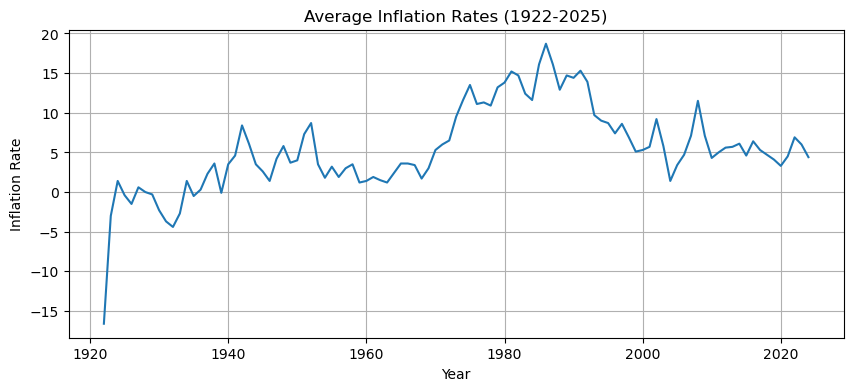

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10,4))
plt.plot(combined_data_2.Year, combined_data_2.Average)

plt.title("Average Inflation Rates (1922-2025)")
plt.xlabel("Year")
plt.ylabel("Inflation Rate")
plt.grid(True)

In [7]:
# Convert from wide to long format

monthly_data = combined_data_2.drop("Average", axis = 1 )

monthly_data_long = monthly_data.melt(id_vars=['Year'], 
                  value_vars=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],
                  var_name='Month', value_name='Inflation_Rate')
monthly_data_long.head()

month_map = {'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'Jun':6,
             'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}
monthly_data_long['Month'] = monthly_data_long['Month'].map(month_map)

monthly_data_long['Date'] = pd.to_datetime(monthly_data_long['Year'].astype(str) + '-' + monthly_data_long['Month'].astype(str) + '-01')


monthly_data_long = monthly_data_long[['Date','Inflation_Rate']].sort_values('Date').set_index('Date')

print(monthly_data_long.tail(6))

            Inflation_Rate
Date                      
2025-07-01             3.5
2025-08-01             NaN
2025-09-01             NaN
2025-10-01             NaN
2025-11-01             NaN
2025-12-01             NaN


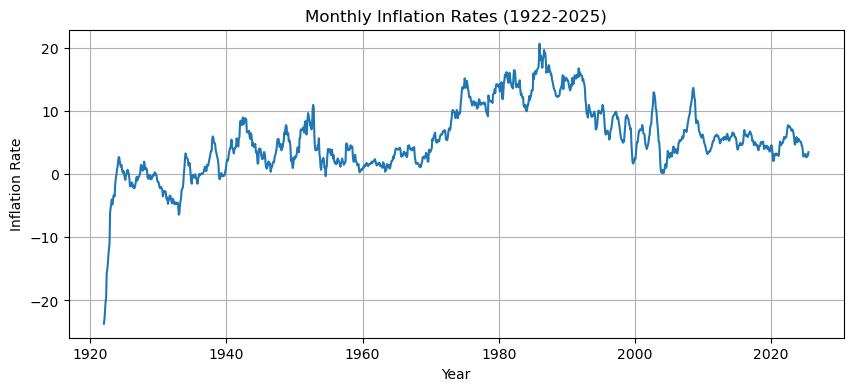

In [8]:
plt.figure(figsize = (10,4))
plt.plot(monthly_data_long.index, monthly_data_long.Inflation_Rate)

plt.title("Monthly Inflation Rates (1922-2025)")
plt.xlabel("Year")
plt.ylabel("Inflation Rate")
plt.grid(True)

### ADF Test to assess for stationarity
#### H_0: The time series has a unit root (is non-stationary).
#### H_A: The time series is stationary

In [9]:
from statsmodels.tsa.stattools import adfuller
monthly_data_long = monthly_data_long.dropna()

result = adfuller(monthly_data_long)
print("ADF Statistic:", result[0])
print("P-value:", result[1])
print("Critical Values:", result[4])


ADF Statistic: -3.0697823609656205
P-value: 0.028871762164032
Critical Values: {'1%': -3.4356863371792095, '5%': -2.8638964938393667, '10%': -2.568024631481501}


#### We conclude it is stationary

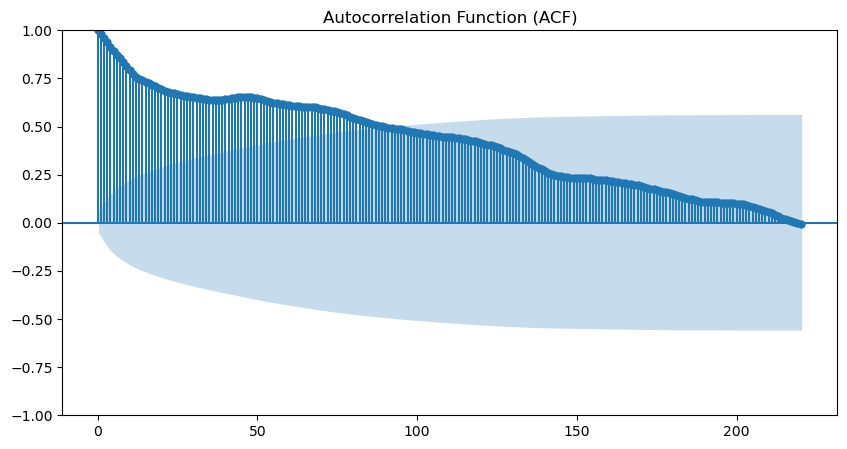

In [10]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 5))
plot_acf(monthly_data_long, lags=220, ax=ax) # 'lags' specifies the number of lags to plot
ax.set_title("Autocorrelation Function (ACF)")
plt.show()

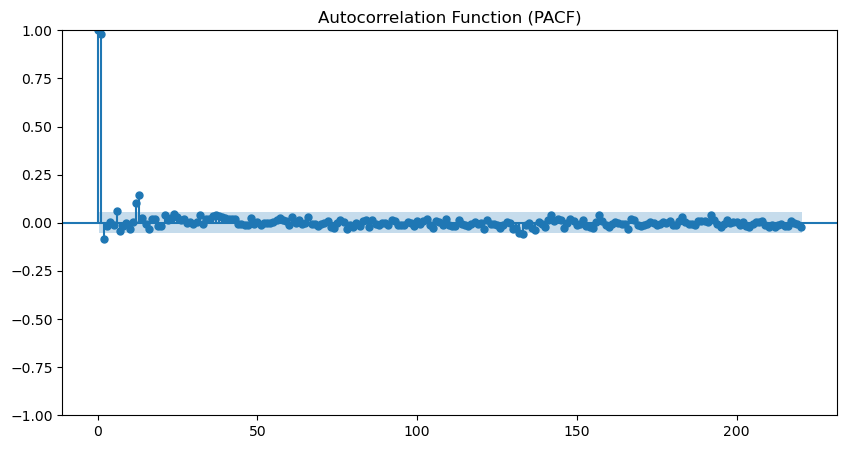

In [11]:
fig, ax = plt.subplots(figsize=(10, 5))
plot_pacf(monthly_data_long, lags=220, ax=ax) # 'lags' specifies the number of lags to plot
ax.set_title("Partial Autocorrelation Function (PACF)")
plt.show()

### Kpss test
#### H_0 : Time series is stationary, either level stationary or trend stationary. 
#### H_A : The time series is non-stationary and contains a unit root. 

In [12]:
from statsmodels.tsa.stattools import kpss

stat, p_value, lags, crit = kpss(monthly_data_long, regression='c', nlags='auto')
print(f"KPSS Statistic: {stat}, p-value: {p_value}")


KPSS Statistic: 2.3145195099101907, p-value: 0.01


/var/folders/9g/q1btgy0d1cx10571fvpjrsz80000gn/T/ipykernel_34950/4155472768.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  stat, p_value, lags, crit = kpss(monthly_data_long, regression='c', nlags='auto')


#### The two stationarity tests give contradicting results

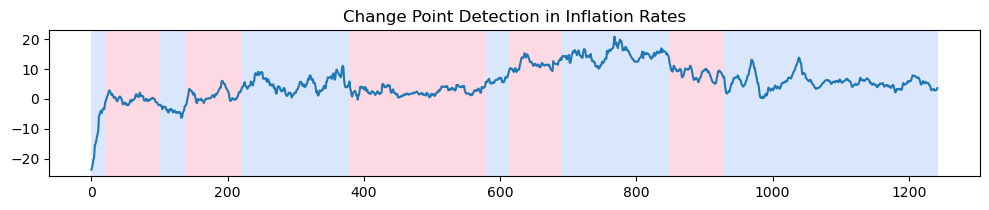

In [35]:
import ruptures as rpt

# converting the time series into a numpy array
signal = monthly_data_long['Inflation_Rate'].values

# fitting the PELT model
model = rpt.Pelt(model="rbf").fit(signal)

# getting the change points
result = model.predict(pen=10)

rpt.display(signal, result)
plt.title("Change Point Detection in Inflation Rates")
plt.show()

#### We see that the mean changes several times.

In [36]:
segments = []
start = 0
for bp in result:
    segment = monthly_data_long[start:bp]
    segments.append(segment)
    start = bp

from statsmodels.tsa.stattools import adfuller, kpss

for i, seg in enumerate(segments):
    adf = adfuller(seg.dropna())
    kpss_stat, kpss_p, _, _ = kpss(seg.dropna(), regression='c', nlags='auto')
    
    if adf[1] < 0.05:
        adf_result = "Stationary"
    else:
        adf_result = " Not stationary"
    if kpss_p < 0.05:
        kpss_result = "Not stationary"
    else:
        kpss_result = "Stationary"   
        
    print(f"Segment {i+1}: ADF p={adf[1]:.3f}, {adf_result}")
    print(f"Segment {i+1}: KPSS p={kpss_p:.3f}, {kpss_result}")


Segment 1: ADF p=0.057,  Not stationary
Segment 1: KPSS p=0.010, Not stationary
Segment 2: ADF p=0.739,  Not stationary
Segment 2: KPSS p=0.100, Stationary
Segment 3: ADF p=0.202,  Not stationary
Segment 3: KPSS p=0.064, Stationary
Segment 4: ADF p=0.088,  Not stationary
Segment 4: KPSS p=0.100, Stationary
Segment 5: ADF p=0.099,  Not stationary
Segment 5: KPSS p=0.100, Stationary
Segment 6: ADF p=0.204,  Not stationary
Segment 6: KPSS p=0.100, Stationary
Segment 7: ADF p=0.991,  Not stationary
Segment 7: KPSS p=0.022, Not stationary
Segment 8: ADF p=0.392,  Not stationary
Segment 8: KPSS p=0.100, Stationary
Segment 9: ADF p=0.019, Stationary
Segment 9: KPSS p=0.100, Stationary
Segment 10: ADF p=0.648,  Not stationary
Segment 10: KPSS p=0.047, Not stationary
Segment 11: ADF p=0.020, Stationary
Segment 11: KPSS p=0.100, Stationary


/var/folders/9g/q1btgy0d1cx10571fvpjrsz80000gn/T/ipykernel_34950/3870110381.py:12: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_stat, kpss_p, _, _ = kpss(seg.dropna(), regression='c', nlags='auto')
/var/folders/9g/q1btgy0d1cx10571fvpjrsz80000gn/T/ipykernel_34950/3870110381.py:12: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_stat, kpss_p, _, _ = kpss(seg.dropna(), regression='c', nlags='auto')
/var/folders/9g/q1btgy0d1cx10571fvpjrsz80000gn/T/ipykernel_34950/3870110381.py:12: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_stat, kpss_p, _, _ = kpss(seg.dropna(), regression='c', nlags='auto')
/var/folders/9g/q1b

In [16]:
from arch.unitroot import ZivotAndrews
za = ZivotAndrews(monthly_data_long)
print(za.summary())


        Zivot-Andrews Results        
Test Statistic                 -4.413
P-value                         0.147
Lags                               14
-------------------------------------

Trend: Constant
Critical Values: -5.28 (1%), -4.81 (5%), -4.57 (10%)
Null Hypothesis: The process contains a unit root with a single structural break.
Alternative Hypothesis: The process is trend and break stationary.


#### With this test we accept the null hypothesis and so it is not stationary

In [17]:
from arch.unitroot import DFGLS
dfgls = DFGLS(monthly_data_long)
print(dfgls.summary())


      Dickey-Fuller GLS Results      
Test Statistic                 -0.062
P-value                         0.672
Lags                               14
-------------------------------------

Trend: Constant
Critical Values: -2.58 (1%), -1.96 (5%), -1.64 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


#### With this test we accept the null hypothesis and so it is not stationary

#### Thus we confirm the series is not stationary and thus needs to be differenced

## Differencing to make data stationary

In [18]:
diff_data = monthly_data_long.diff().dropna()
diff_data.head()

,Inflation_Rate
Date,
1922-02-01,0.7
1922-03-01,1.2
1922-04-01,1.5
1922-05-01,0.7
1922-06-01,3.9


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


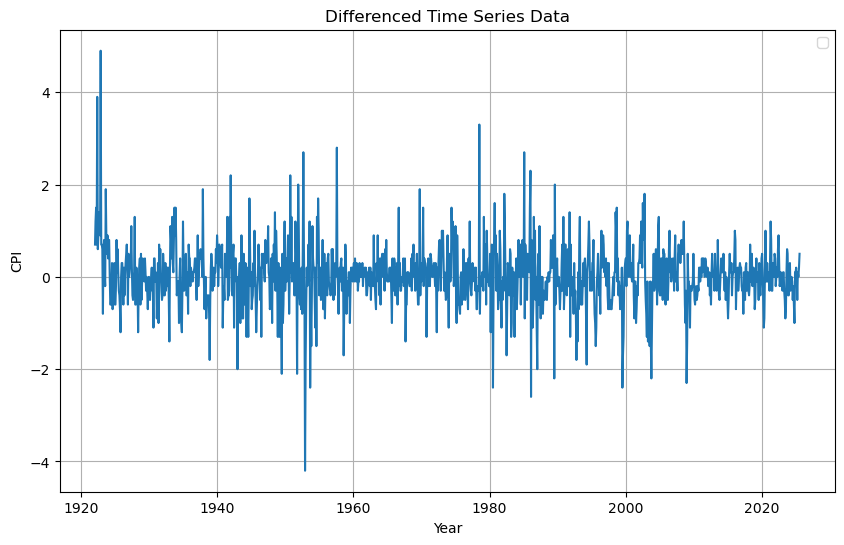

In [38]:
plt.figure(figsize=(10,6))
plt.plot(diff_data.index, diff_data.Inflation_Rate)
plt.legend()
plt.title("Differenced Time Series Data")
plt.ylabel("CPI")
plt.xlabel("Year")
plt.grid(True)
plt.show()

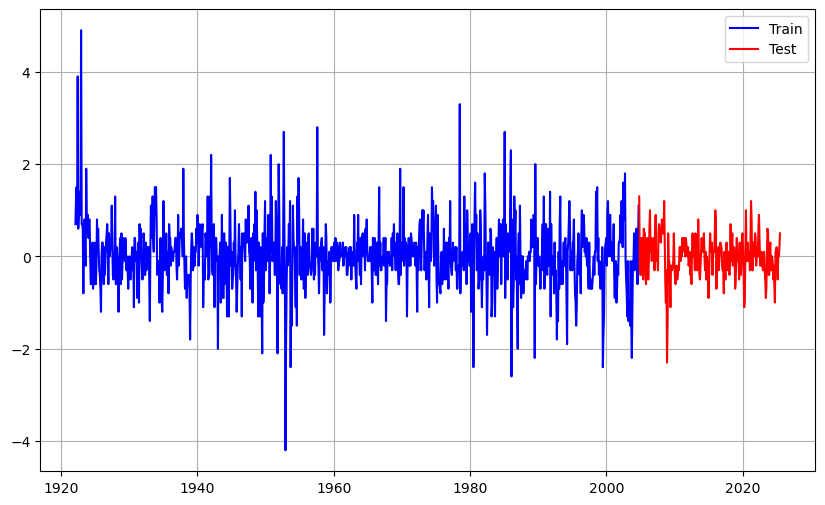

In [19]:
# monthly_data_long = monthly_data_long[:-5]
train_size = int(0.8 * len(diff_data))
train = diff_data[:train_size].dropna()
test = diff_data[train_size:].dropna()

plt.figure(figsize=(10,6))
plt.plot(train, label='Train', color='blue')
plt.plot(test, label='Test', color='red')
plt.legend()
plt.grid(True)
plt.show()

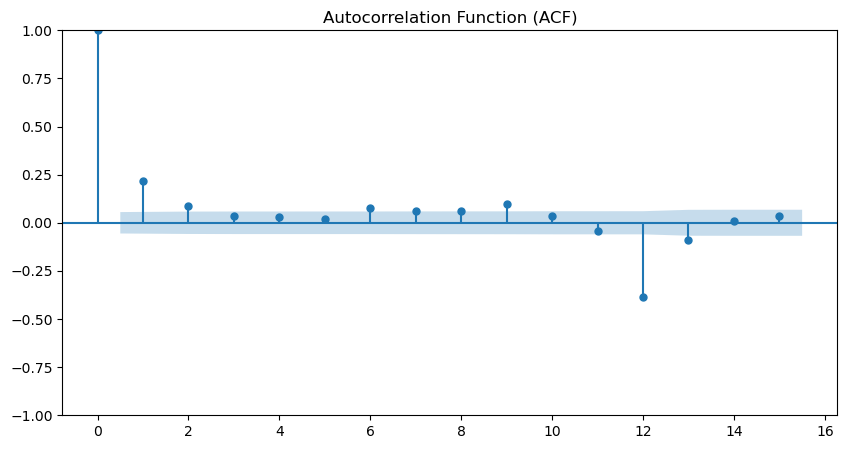

In [20]:
fig, ax = plt.subplots(figsize=(10, 5))
plot_acf(diff_data, lags=15, ax=ax) # 'lags' specifies the number of lags to plot
ax.set_title("Autocorrelation Function (ACF)")
plt.show()

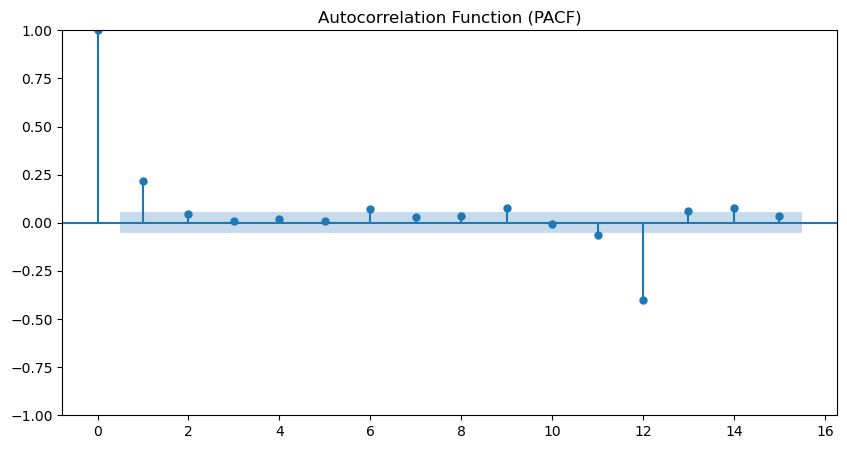

In [21]:
fig, ax = plt.subplots(figsize=(10, 5))
plot_pacf(diff_data, lags=15, ax=ax) # 'lags' specifies the number of lags to plot
ax.set_title("Autocorrelation Function (PACF)")
plt.show()

# Model fitting using Prophet

In [26]:
train_size = int(0.8 * len(monthly_data_long))
train2 = monthly_data_long[:train_size].dropna()
test2 = monthly_data_long[train_size:].dropna()


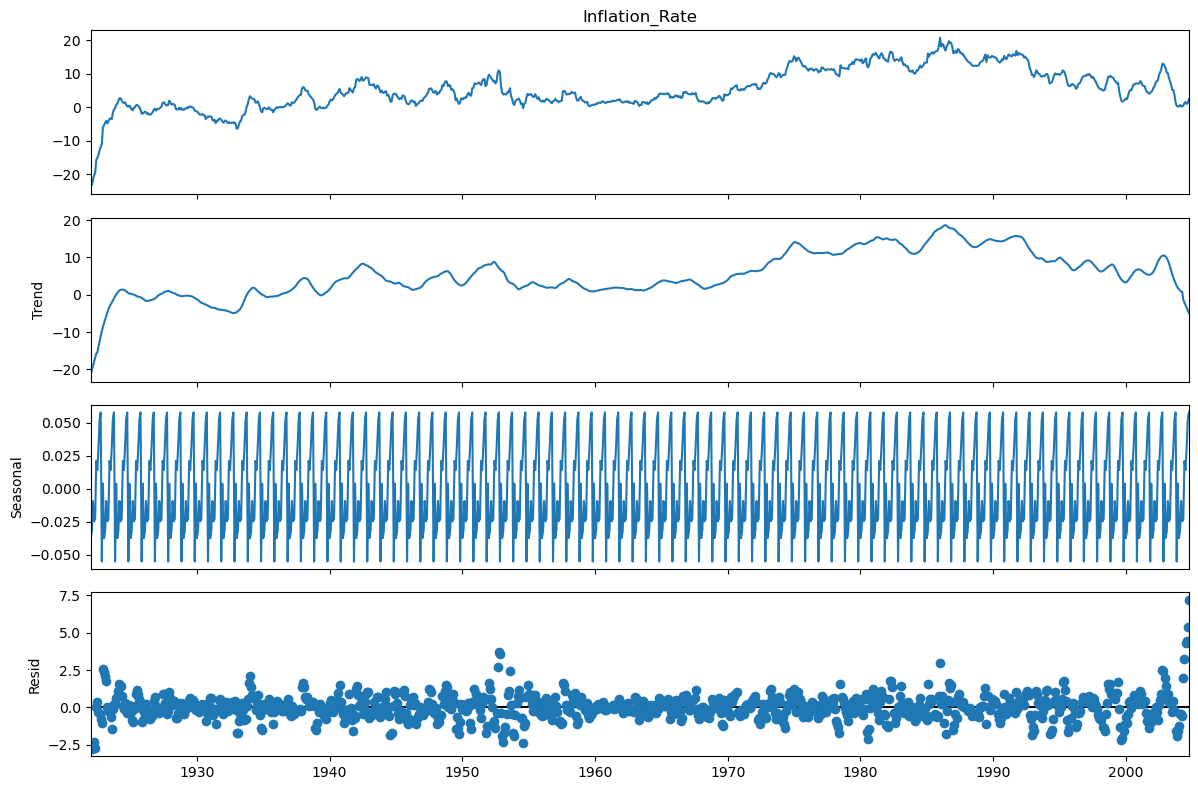

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose = seasonal_decompose(train2["Inflation_Rate"], model='additive', extrapolate_trend='freq', period=12)

decompose.plot().set_size_inches(12, 8) 
plt.tight_layout()
plt.show()

In [28]:
train_prophet = train2.copy()
train_prophet = train2.reset_index()
train_prophet = train_prophet.rename(columns={"Date": "ds", "Inflation_Rate": "y"})

test_prophet = test2.copy()
test_prophet = test2.reset_index()
test_prophet = test_prophet.rename(columns={"Date": "ds", "Inflation_Rate": "y"})


In [30]:
from prophet import Prophet
model_prophet  = Prophet()
model_prophet.fit(train_prophet)

20:46:50 - cmdstanpy - INFO - Chain [1] start processing
20:46:50 - cmdstanpy - INFO - Chain [1] done processing


In [31]:
df_future = model_prophet.make_future_dataframe(periods=len(test_prophet), freq='MS')
display(df_future.head())

,ds
0,1922-01-01
1,1922-02-01
2,1922-03-01
3,1922-04-01
4,1922-05-01
...,...
1238,2025-03-01
1239,2025-04-01
1240,2025-05-01
1241,2025-06-01


In [32]:
forecast_prophet = model_prophet.predict(df_future)
forecast_prophet[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].round().tail()

,ds,yhat,yhat_lower,yhat_upper
1238,2025-03-01,-9.0,-15.0,-3.0
1239,2025-04-01,-9.0,-15.0,-3.0
1240,2025-05-01,-9.0,-15.0,-2.0
1241,2025-06-01,-9.0,-15.0,-2.0
1242,2025-07-01,-9.0,-15.0,-3.0


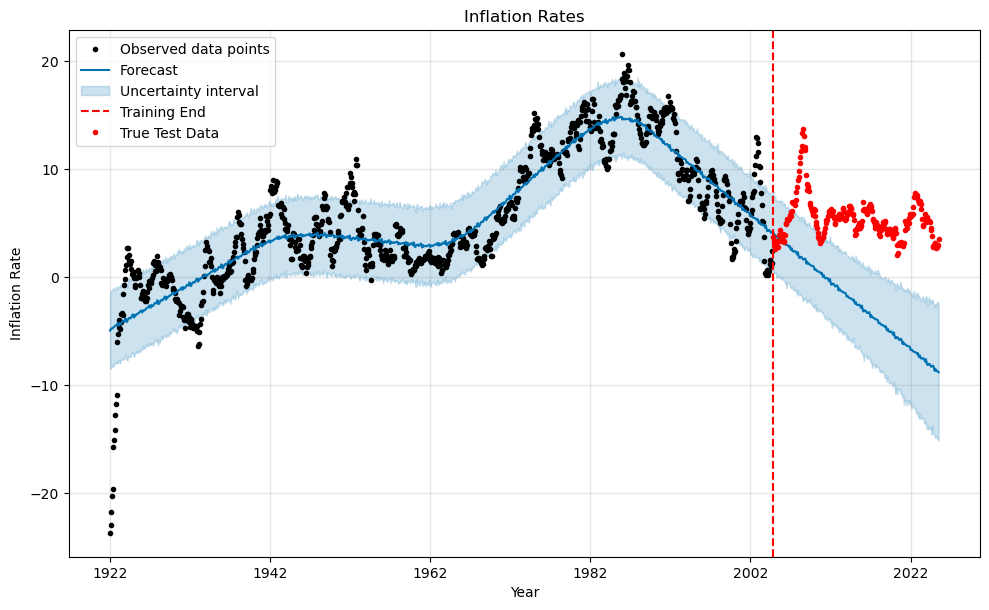

In [39]:
import matplotlib.pyplot as plt

# plot the time series 
forecast_plot = model_prophet.plot(forecast_prophet)

# add a vertical line at the end of the training period
axes = forecast_plot.gca()
last_training_date = forecast_prophet['ds'].iloc[-len(test_prophet)]
axes.axvline(x=last_training_date, color='red', linestyle='--', label='Training End')

# plot true test data for the period after the red line
test_prophet['ds'] = pd.to_datetime(test_prophet['ds'])
plt.plot(test_prophet['ds'], test_prophet['y'],'ro', markersize=3, label='True Test Data')

# show the legend to distinguish between the lines
plt.ylabel("Inflation Rate")
plt.xlabel("Year")
plt.title("Inflation Rates")

plt.legend()